<a href="https://colab.research.google.com/github/ShivaShirsath/dl/blob/master/Bmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget https://raw.githubusercontent.com/richzhang/colorization/caffe/models/colorization_deploy_v2.prototxt
! wget https://raw.githubusercontent.com/HemantKArya/BW2Color/master/model/pts_in_hull.npy
! wget https://people.eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v2/colorization_release_v2.caffemodel

--2023-03-03 17:29:33--  https://raw.githubusercontent.com/richzhang/colorization/caffe/models/colorization_deploy_v2.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9945 (9.7K) [text/plain]
Saving to: ‘colorization_deploy_v2.prototxt.1’

colorization_deploy 100%[===================>]   9.71K  --.-KB/s    in 0s      

2023-03-03 17:29:33 (89.5 MB/s) - ‘colorization_deploy_v2.prototxt.1’ saved [9945/9945]

--2023-03-03 17:29:33--  https://raw.githubusercontent.com/HemantKArya/BW2Color/master/model/pts_in_hull.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sen

In [3]:
from google.colab import files

# Upload the JPG file
uploaded = files.upload()

# Save the file in /content folder with the filename "image.jpg"
for filename in uploaded.keys():
    with open('/content/image.jpg', 'wb') as f:
        f.write(uploaded[filename])

Saving mark_twain.jpg to mark_twain.jpg
don


In [4]:
import numpy as np 
import cv2

print("loading models.....")
net = cv2.dnn.readNetFromCaffe('./colorization_deploy_v2.prototxt','./colorization_release_v2.caffemodel')
pts = np.load('./pts_in_hull.npy')

loading models.....


In [7]:
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = pts.transpose().reshape(2,313,1,1)

net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1,313],2.606,dtype='float32')]

image = cv2.imread("/content/image.jpg")

scaled = image.astype("float32")/255.0
lab = cv2.cvtColor(scaled,cv2.COLOR_BGR2LAB)

resized = cv2.resize(lab,(224,224))
L = cv2.split(resized)[0]
L -= 50

net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1,2,0))

ab = cv2.resize(ab, (image.shape[1],image.shape[0]))

L = cv2.split(lab)[0]
colorized = np.concatenate((L[:,:,np.newaxis], ab), axis=2)

colorized = cv2.cvtColor(colorized,cv2.COLOR_LAB2BGR)
colorized = np.clip(colorized,0,1)

colorized = (255 * colorized).astype("uint8")

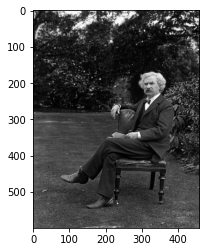

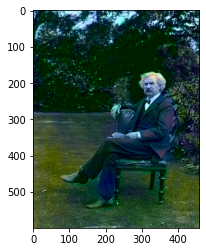

-1

In [8]:
import matplotlib.pyplot as plt

# Display the image using imshow
plt.imshow(image)
plt.show()

plt.imshow(colorized)
plt.show()
cv2.waitKey(0)